Data Sets:
(Manhattan Pollution) Annual, Summer, Winter
Manhattan median household income

Identify and graph pollution trends between different neighborhoods
compare to income

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


<Figure size 1200x600 with 0 Axes>

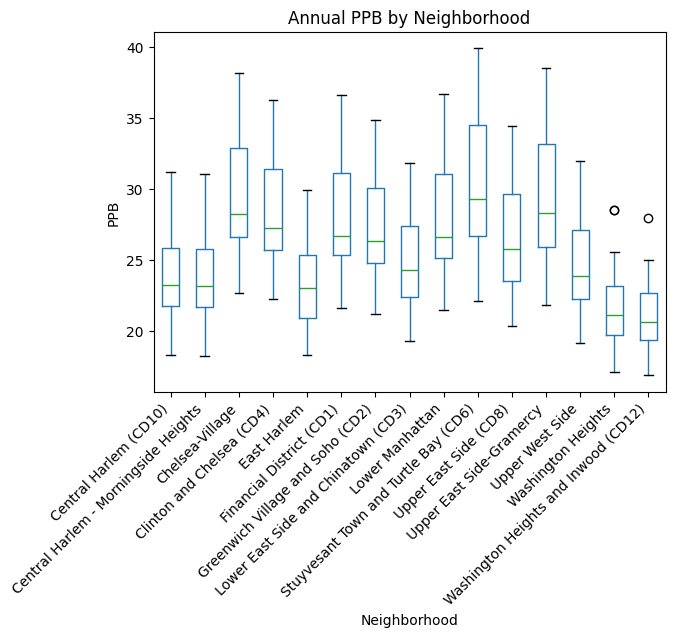

In [7]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Annual_Air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Annual PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

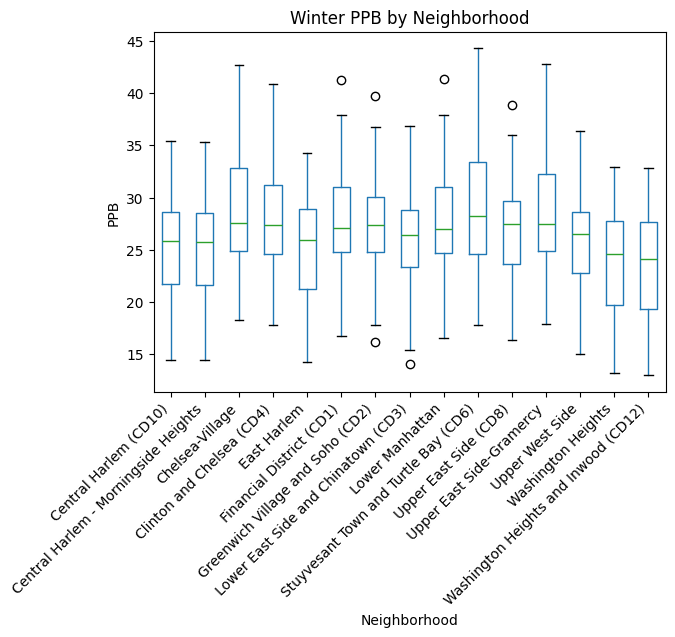

In [10]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Winter_air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Winter PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

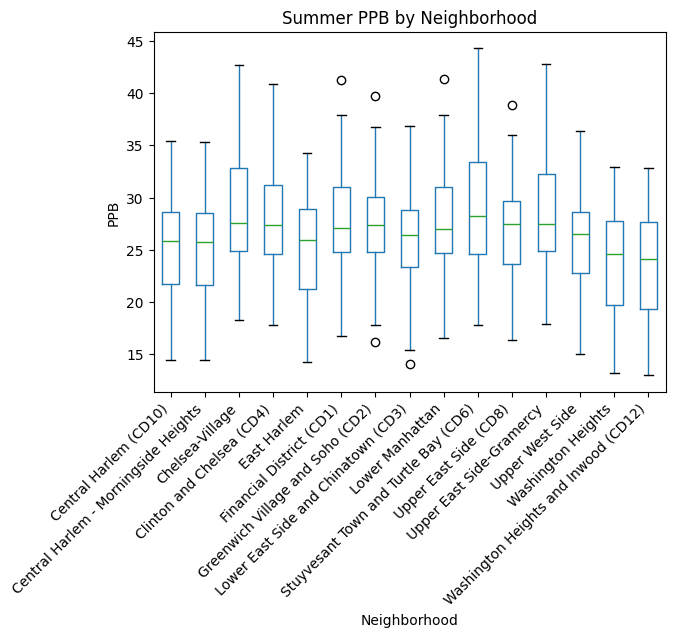

In [11]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Summer_air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Summer PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

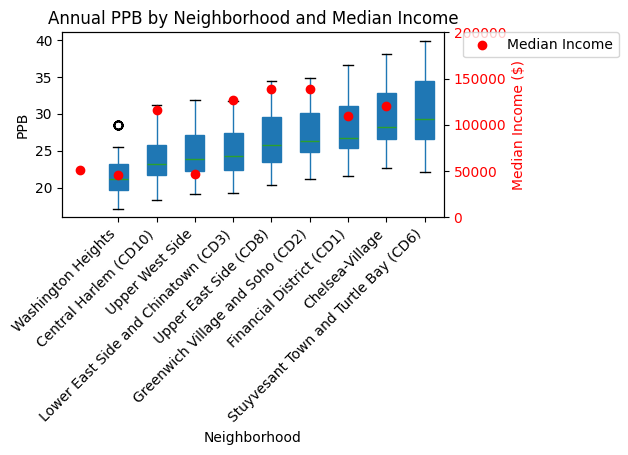

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../Data/Project_Data/Annual_Air.csv')

# Load the median income data
income_data = pd.read_csv('../Data/Project_Data/Filtered_Neighborhoods.csv')
# Merge the datasets, keeping only neighborhoods present in both tables
merged_data = data.merge(income_data, left_on="Geo Place Name", right_on="Location", how="inner")

# Calculate the median PPB for each neighborhood
ppb_medians = merged_data.groupby("Geo Place Name")["Data Value"].median()

# Sort the neighborhoods by their median PPB values in ascending order
sorted_neighborhoods = ppb_medians.sort_values().index

# Reorder the data based on the sorted neighborhoods
merged_data["Geo Place Name"] = pd.Categorical(merged_data["Geo Place Name"], categories=sorted_neighborhoods, ordered=True)

# Create the box plot with the reordered neighborhoods
plt.figure(figsize=(14, 8))
boxplot = merged_data.boxplot(column="Data Value", by="Geo Place Name", grid=False, patch_artist=True)

# Add labels and title for the air quality plot
plt.title("Annual PPB by Neighborhood and Median Income")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")
plt.xticks(rotation=45, ha='right')
income_medians = income_data.groupby("Location")["Data"].median()

# Create a twin y-axis for the income data
ax2 = plt.gca().twinx()

# Plot the median income data as scatter points
ax2.scatter(sorted_neighborhoods, [income_medians.get(loc, None) for loc in sorted_neighborhoods], 
            color='red', label="Median Income", zorder=10)

# Adjust the range of the secondary y-axis
ax2.set_ylim(0, 200000)

# Add labels for the secondary y-axis
ax2.set_ylabel("Median Income ($)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Move the legend to a better location
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the combined plot
plt.tight_layout()
plt.show()

Slope: 4.675809546034031e-05
Intercept: 21.21916766024822
R-squared: 0.14017290484392886
P-value: 3.1647249440609816e-58
Standard Error: 2.7972090911900947e-06


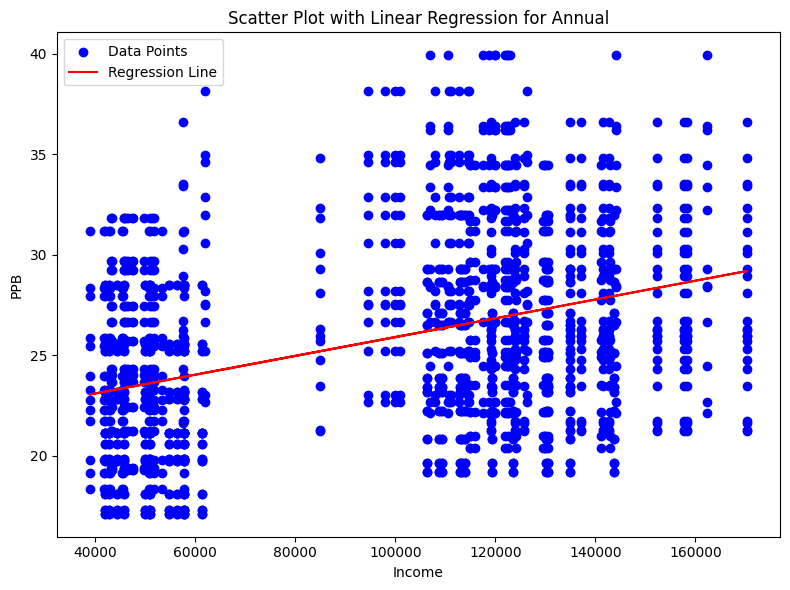

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the datasets
air = pd.read_csv('../Data/Project_Data/Annual_Air.csv')
income = pd.read_csv('../Data/Project_Data/Filtered_Neighborhoods.csv')

# Merge the datasets on the neighborhood name (adjust column names as necessary)
merged_data = air.merge(income, left_on="Geo Place Name", right_on="Location", how="inner")

# Extract x (Income) and y (PPB)
x = merged_data["Data"]  # Median income
y = merged_data["Data Value"]  # PPB air quality

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Data Points")

# Plot the regression line
plt.plot(x, slope * x + intercept, color="red", label="Regression Line")

# Add labels, title, and legend
plt.xlabel("Income")
plt.ylabel("PPB")
plt.title("Scatter Plot with Linear Regression for Annual")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Slope: 2.905056533867009e-05
Intercept: 23.452903612568385
R-squared: 0.04773602060767753
P-value: 2.256243790342867e-76
Standard Error: 1.5514841625699833e-06


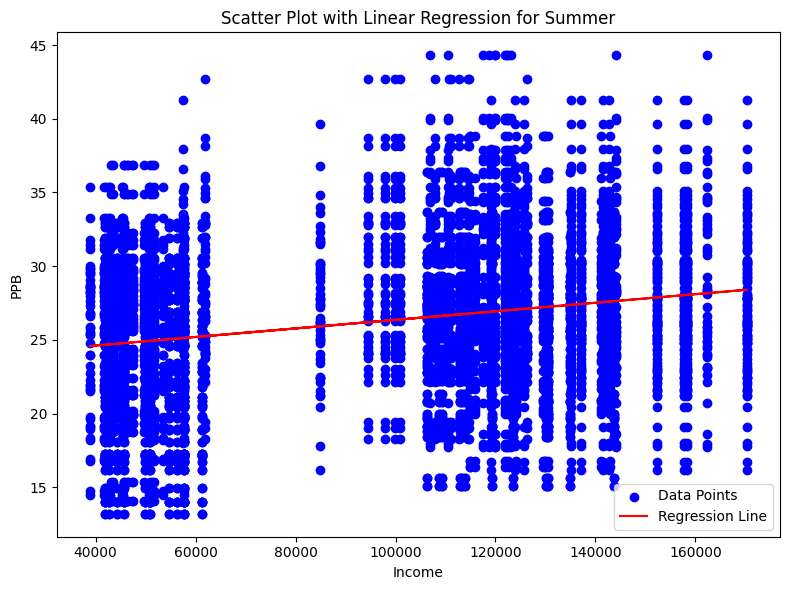

In [16]:

# Load the datasets
air = pd.read_csv('../Data/Project_Data/Summer_Air.csv')
income = pd.read_csv('../Data/Project_Data/Filtered_Neighborhoods.csv')

# Merge the datasets on the neighborhood name (adjust column names as necessary)
merged_data = air.merge(income, left_on="Geo Place Name", right_on="Location", how="inner")

# Extract x (Income) and y (PPB)
x = merged_data["Data"]  # Median income
y = merged_data["Data Value"]  # PPB air quality

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Data Points")

# Plot the regression line
plt.plot(x, slope * x + intercept, color="red", label="Regression Line")

# Add labels, title, and legend
plt.xlabel("Income")
plt.ylabel("PPB")
plt.title("Scatter Plot with Linear Regression for Summer")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Slope: 2.905056533867009e-05
Intercept: 23.452903612568385
R-squared: 0.04773602060767753
P-value: 2.256243790342867e-76
Standard Error: 1.5514841625699833e-06


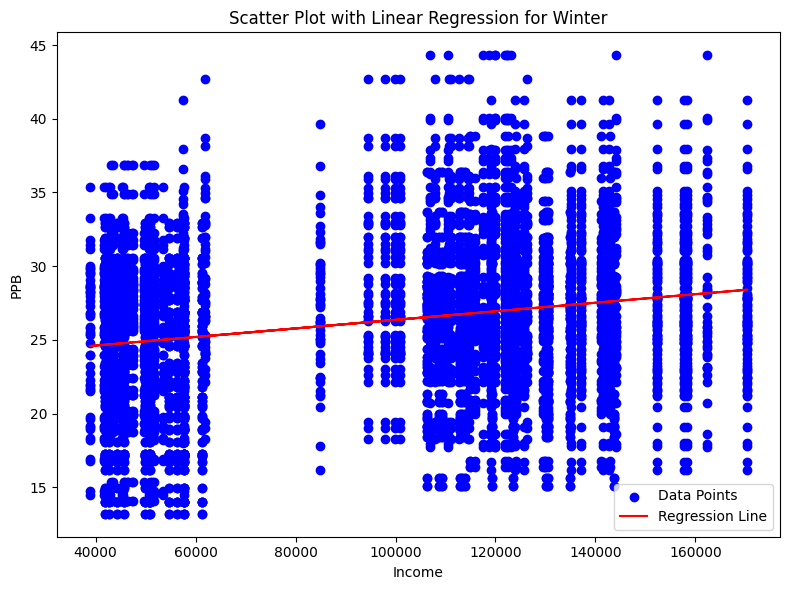

In [17]:

# Load the datasets
air = pd.read_csv('../Data/Project_Data/Winter_Air.csv')
income = pd.read_csv('../Data/Project_Data/Filtered_Neighborhoods.csv')

# Merge the datasets on the neighborhood name (adjust column names as necessary)
merged_data = air.merge(income, left_on="Geo Place Name", right_on="Location", how="inner")

# Extract x (Income) and y (PPB)
x = merged_data["Data"]  # Median income
y = merged_data["Data Value"]  # PPB air quality

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Data Points")

# Plot the regression line
plt.plot(x, slope * x + intercept, color="red", label="Regression Line")

# Add labels, title, and legend
plt.xlabel("Income")
plt.ylabel("PPB")
plt.title("Scatter Plot with Linear Regression for Winter")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
